# Step #6: Attack Timeline Analysis & Dataset Labeling

**Comprehensive APT Simulation Timeline Visualization and MITRE ATT&CK Tactic Labeling**

---

## Overview

This notebook presents the complete timeline analysis of the APT34 (OilRig) simulation, focusing on:
- **Timeline Visualization**: Multi-computer attack progression with color-shape tactic mapping
- **Spawned Events Analysis**: Detailed breakdown of recursive event tracing results
- **Tactic Distribution**: MITRE ATT&CK framework analysis across the attack lifecycle
- **Dataset Labeling**: ML-ready labeled dataset generation for cybersecurity research

### Methodology

Our approach follows the exact logic from `sysmon_event_analysis.py`:
1. **Zero-level Event Detection**: Find initial attack entry points using Caldera hints
2. **Recursive Event Tracing**: Discover complete causal chains with spawned events
3. **Timeline Reconstruction**: Organize events across multiple computers chronologically
4. **Tactic Labeling**: Apply MITRE ATT&CK tactic labels from Caldera simulation data
5. **Visualization**: Generate multi-dimensional plots using color-shape mapping for tactic distinction

### Key Innovations

- **Color-Shape Tactic Mapping**: Each MITRE ATT&CK tactic has a unique color + shape combination for superior visual distinction
- **Cross-Computer Analysis**: Timeline spans 3 computers (theblock → waterfalls → endofroad) showing lateral movement
- **Recursive Depth Analysis**: Deep event tracing reveals complete attack impact beyond initial commands
- **ML-Ready Labeling**: Generates labeled dataset suitable for anomaly detection and attack classification models

## Section 1: Setup & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import json
import warnings
warnings.filterwarnings('ignore')

# Import our timeline plotter
from sysmon_event_analysis import load_config, load_sysmon_data, load_caldera_data
import importlib.util
import sys

# Import timeline plotter (handling numeric filename)
spec = importlib.util.spec_from_file_location("timeline_plotter", "6_simple_timeline_plotter.py")
timeline_module = importlib.util.module_from_spec(spec)
sys.modules["timeline_plotter"] = timeline_module
spec.loader.exec_module(timeline_module)
SimpleTimelinePlotter = timeline_module.SimpleTimelinePlotter

# Configure plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

print("🔧 Environment setup complete")
print("📊 Ready for APT timeline analysis")

🔧 Environment setup complete
📊 Ready for APT timeline analysis


### Data Loading & Validation

In [2]:
# Initialize timeline plotter with custom configuration
plot_config = {
    'figure_width': 16,
    'subplot_height': 5,
    'dpi': 300,
    'marker_size': 70,
    'marker_alpha': 0.8,
    'output_format': 'png'
}

print("🚀 Initializing Timeline Plotter...")
plotter = SimpleTimelinePlotter(plot_config=plot_config)

print("\n📋 Data Summary:")
print(f"   Sysmon Events: {len(plotter.sysmon_df):,}")
print(f"   Caldera Entries: {len(plotter.caldera_entries)}")
print(f"   Entry Config: {len(plotter.entry_config_df)} entries")

# Show time range
time_col = 'UtcTime'
start_time = pd.to_datetime(plotter.sysmon_df[time_col]).min()
end_time = pd.to_datetime(plotter.sysmon_df[time_col]).max()
print(f"   Time Range: {start_time.strftime('%H:%M:%S')} to {end_time.strftime('%H:%M:%S')}")
print(f"   Duration: {end_time - start_time}")

🚀 Initializing Timeline Plotter...
🔧 Initializing Simple Timeline Plotter...
✅ Configuration loaded and validated from config.yaml
✅ Configuration loaded and validated from config.yaml
✅ Sysmon data loaded: 570078 rows
   Time range: 2025-05-04 11:30:00.012000 to 2025-05-04 12:40:00.980000
   Event types: [np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(9), np.uint8(10), np.uint8(11), np.uint8(12), np.uint8(13), np.uint8(15), np.uint8(17), np.uint8(18), np.uint8(23), np.uint8(24), np.uint8(25)]
   ⚠️  Data quality warnings: 2
      - High null percentage in columns: {'Protocol': 97.03233592596101, 'SourceIsIpv6': 97.03233592596101, 'SourceIp': 97.03233592596101, 'SourceHostname': 97.03233592596101, 'SourcePort': 97.03233592596101, 'SourcePortName': 97.03233592596101, 'DestinationIsIpv6': 97.03233592596101, 'DestinationIp': 97.03233592596101, 'DestinationHostname': 97.03233592596101, 'DestinationPort': 97.03233592596101, 'DestinationPo

### Entry Configuration Analysis

In [3]:
# Analyze entry configuration
entry_config = plotter.entry_config_df
print("📋 Entry Configuration Summary:")
print(f"   Total Entries: {len(entry_config)}")

# Computer distribution
computer_dist = entry_config['computer_short'].value_counts()
print("\n💻 Computer Distribution:")
for computer, count in computer_dist.items():
    print(f"   {computer}: {count} entries")

# EventID distribution
eventid_dist = entry_config['totem_eventid'].value_counts()
print("\n🔍 EventID Distribution:")
event_types = {1: "ProcessCreate", 11: "FileCreate", 23: "FileDelete"}
for eventid, count in eventid_dist.items():
    event_type = event_types.get(eventid, "Unknown")
    print(f"   EventID {eventid} ({event_type}): {count} entries")

# Show first and last few entries
print("\n📊 Entry Configuration Sample:")
display(entry_config.head(10))

📋 Entry Configuration Summary:
   Total Entries: 49

💻 Computer Distribution:
   theblock: 29 entries
   waterfalls: 16 entries
   endofroad: 4 entries

🔍 EventID Distribution:
   EventID 1 (ProcessCreate): 38 entries
   EventID 11 (FileCreate): 7 entries
   EventID 23 (FileDelete): 4 entries

📊 Entry Configuration Sample:


,entry_id,computer_short,totem_eventid
0,0,theblock,1
1,1,theblock,1
2,2,theblock,1
3,3,theblock,1
4,4,theblock,1
5,5,theblock,1
6,6,theblock,1
7,7,theblock,1
8,8,theblock,1
9,9,theblock,1


## Section 2: Timeline Processing & Event Analysis

In [4]:
# Process all entries to generate timeline data
print("🔄 Processing APT simulation entries...")
print("This will follow sysmon_event_analysis.py logic exactly for each entry")
print("=" * 60)

# Run the complete timeline analysis
plotter.process_all_entries()

print("\n✅ Timeline processing complete!")
print(f"📊 Events collected across {len(plotter.computer_events)} computers")

🔄 Processing APT simulation entries...
This will follow sysmon_event_analysis.py logic exactly for each entry

🚀 Processing entries from entry_config.csv...
📋 Processing 49 entries: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51]

🔍 Processing Entry 0
📋 Entry 0: theblock, EventID 1
   Analysis Type: Type1 (CommandLine with recursive tracing)
   Command: cscript /nologo computername.vbs...
   Tactic: discovery
✅ Detection successful: 2 matches
🔄 Applying Type1 analysis (recursive tracing enabled)...
   Level 1 events found: 13 events

🔄 RECURSIVE EVENT TRACING:
   Finding all spawned events recursively...
   🎯 Starting with 2 spawning-capable events from Level 1
   🔄 Depth 0: Tracing from ProcessCreate a978ae42-513a-6817-e200-000000001100_2432
      └─ Found 55 children (55, 0, 0)
   🛑 Depth 0: No more spawning candidates - recursion ends
   ✅ Recurs

## Section 3: Spawned Events Analysis

In [5]:
# Generate spawned events summary
plotter.print_spawned_events_summary()

# Collect spawned events data for analysis
spawned_data = []
for computer, events_list in plotter.computer_events.items():
    for event_record in events_list:
        entry_id = event_record['entry_id']
        spawned_count = event_record['spawned_count']
        tactic = event_record['tactic']
        computer_short = computer.replace('.boombox.local', '')
        
        spawned_data.append({
            'entry_id': int(entry_id),
            'spawned_count': spawned_count,
            'computer': computer_short,
            'tactic': tactic
        })

# Remove duplicates (same entry can appear multiple times)
spawned_df = pd.DataFrame(spawned_data).drop_duplicates(subset=['entry_id'])
spawned_df = spawned_df.sort_values('entry_id')

print(f"\n📊 Spawned Events Analysis Summary:")
print(f"   Total Entries Processed: {len(spawned_df)}")
print(f"   Total Spawned Events: {spawned_df['spawned_count'].sum():,}")
print(f"   Average Spawned per Entry: {spawned_df['spawned_count'].mean():.1f}")
print(f"   Maximum Spawned (Single Entry): {spawned_df['spawned_count'].max()}")
print(f"   Entries with >100 Spawned Events: {len(spawned_df[spawned_df['spawned_count'] > 100])}")


📊 SPAWNED EVENTS SUMMARY:
Entry  0:  68 spawned events | theblock   | discovery
Entry  1:  66 spawned events | theblock   | discovery
Entry  2:  39 spawned events | theblock   | discovery
Entry  3:  31 spawned events | theblock   | discovery
Entry  4:  32 spawned events | theblock   | discovery
Entry  5:  54 spawned events | theblock   | discovery
Entry  6:  53 spawned events | theblock   | discovery
Entry  7:  50 spawned events | theblock   | discovery
Entry  8:  53 spawned events | theblock   | discovery
Entry  9:  53 spawned events | theblock   | discovery
Entry 10:  52 spawned events | theblock   | discovery
Entry 11:  54 spawned events | theblock   | discovery
Entry 12:  31 spawned events | theblock   | discovery
Entry 13:  53 spawned events | theblock   | discovery
Entry 14:  21 spawned events | theblock   | discovery
Entry 15:  50 spawned events | theblock   | discovery
Entry 16:  23 spawned events | theblock   | discovery
Entry 17:  51 spawned events | theblock   | discovery
E

### Spawned Events Visualization

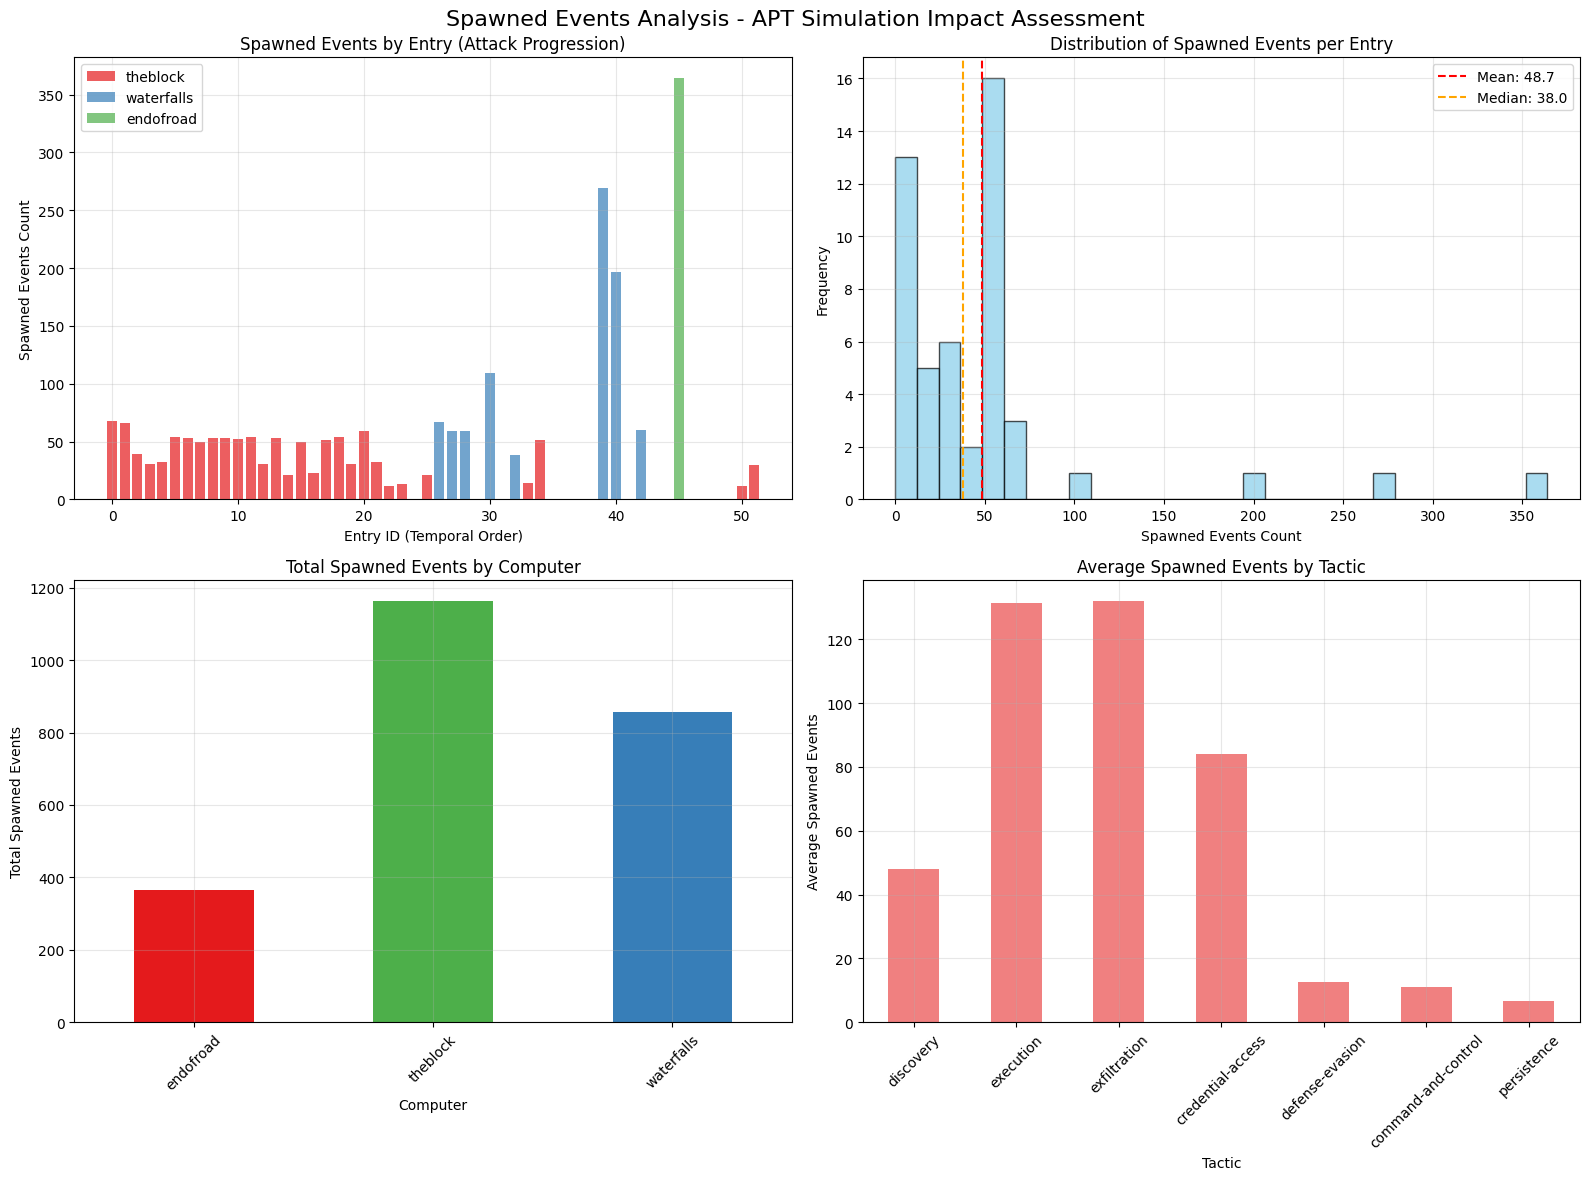


🔥 Top 10 Entries by Spawned Events:
   Entry 45: 364 events | endofroad  | exfiltration
   Entry 39: 269 events | waterfalls | execution
   Entry 40: 197 events | waterfalls | execution
   Entry 30: 109 events | waterfalls | credential-access
   Entry  0:  68 events | theblock   | discovery
   Entry 26:  67 events | waterfalls | discovery
   Entry  1:  66 events | theblock   | discovery
   Entry 42:  60 events | waterfalls | execution
   Entry 20:  59 events | theblock   | credential-access
   Entry 27:  59 events | waterfalls | discovery


In [6]:
# Create comprehensive spawned events analysis plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Spawned Events Analysis - APT Simulation Impact Assessment', fontsize=16)

# 1. Spawned events by entry (timeline progression)
ax1 = axes[0, 0]
colors = {'theblock': '#e41a1c', 'waterfalls': '#377eb8', 'endofroad': '#4daf4a'}
for computer in ['theblock', 'waterfalls', 'endofroad']:
    computer_data = spawned_df[spawned_df['computer'] == computer]
    if len(computer_data) > 0:
        ax1.bar(computer_data['entry_id'], computer_data['spawned_count'], 
               alpha=0.7, label=computer, color=colors[computer])

ax1.set_xlabel('Entry ID (Temporal Order)')
ax1.set_ylabel('Spawned Events Count')
ax1.set_title('Spawned Events by Entry (Attack Progression)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Distribution histogram
ax2 = axes[0, 1]
ax2.hist(spawned_df['spawned_count'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(spawned_df['spawned_count'].mean(), color='red', linestyle='--', 
           label=f'Mean: {spawned_df["spawned_count"].mean():.1f}')
ax2.axvline(spawned_df['spawned_count'].median(), color='orange', linestyle='--',
           label=f'Median: {spawned_df["spawned_count"].median():.1f}')
ax2.set_xlabel('Spawned Events Count')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Spawned Events per Entry')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Computer-wise breakdown
ax3 = axes[1, 0]
computer_totals = spawned_df.groupby('computer')['spawned_count'].agg(['sum', 'mean', 'count'])
computer_totals['sum'].plot(kind='bar', ax=ax3, color=['#e41a1c', '#4daf4a', '#377eb8'])
ax3.set_xlabel('Computer')
ax3.set_ylabel('Total Spawned Events')
ax3.set_title('Total Spawned Events by Computer')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# 4. Tactic impact analysis
ax4 = axes[1, 1]
tactic_impact = spawned_df.groupby('tactic')['spawned_count'].agg(['sum', 'mean']).sort_values('sum', ascending=False)
tactic_impact['mean'].plot(kind='bar', ax=ax4, color='lightcoral')
ax4.set_xlabel('Tactic')
ax4.set_ylabel('Average Spawned Events')
ax4.set_title('Average Spawned Events by Tactic')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print top spawning entries
print("\n🔥 Top 10 Entries by Spawned Events:")
top_spawners = spawned_df.nlargest(10, 'spawned_count')
for _, row in top_spawners.iterrows():
    print(f"   Entry {row['entry_id']:2d}: {row['spawned_count']:3d} events | {row['computer']:10s} | {row['tactic']}")

## Section 4: Main Timeline Visualization

🎨 Generating main attack timeline visualization...
This plot shows the complete attack progression across all computers
Each tactic has a unique color + shape combination for visual distinction

📈 Creating timeline plots by computer...
📊 Computers with events (ordered by first appearance): ['theblock', 'waterfalls', 'endofroad']
🏷️ Tactics found: ['command-and-control', 'credential-access', 'defense-evasion', 'discovery', 'execution', 'exfiltration', 'persistence']
🎨 Tactic color-and-shape mapping:
   command-and-control: #ffff33 >
   credential-access: #a65628 D
   defense-evasion: #ff7f00 <
   discovery: #f781bf p
   execution: #000000 x
   exfiltration: #33a02c H
   persistence: #4daf4a ^
📊 Plotting 1192 events for theblock
📊 Plotting 874 events for waterfalls
📊 Plotting 368 events for endofroad
💾 Timeline plot saved: timeline_by_computer.png


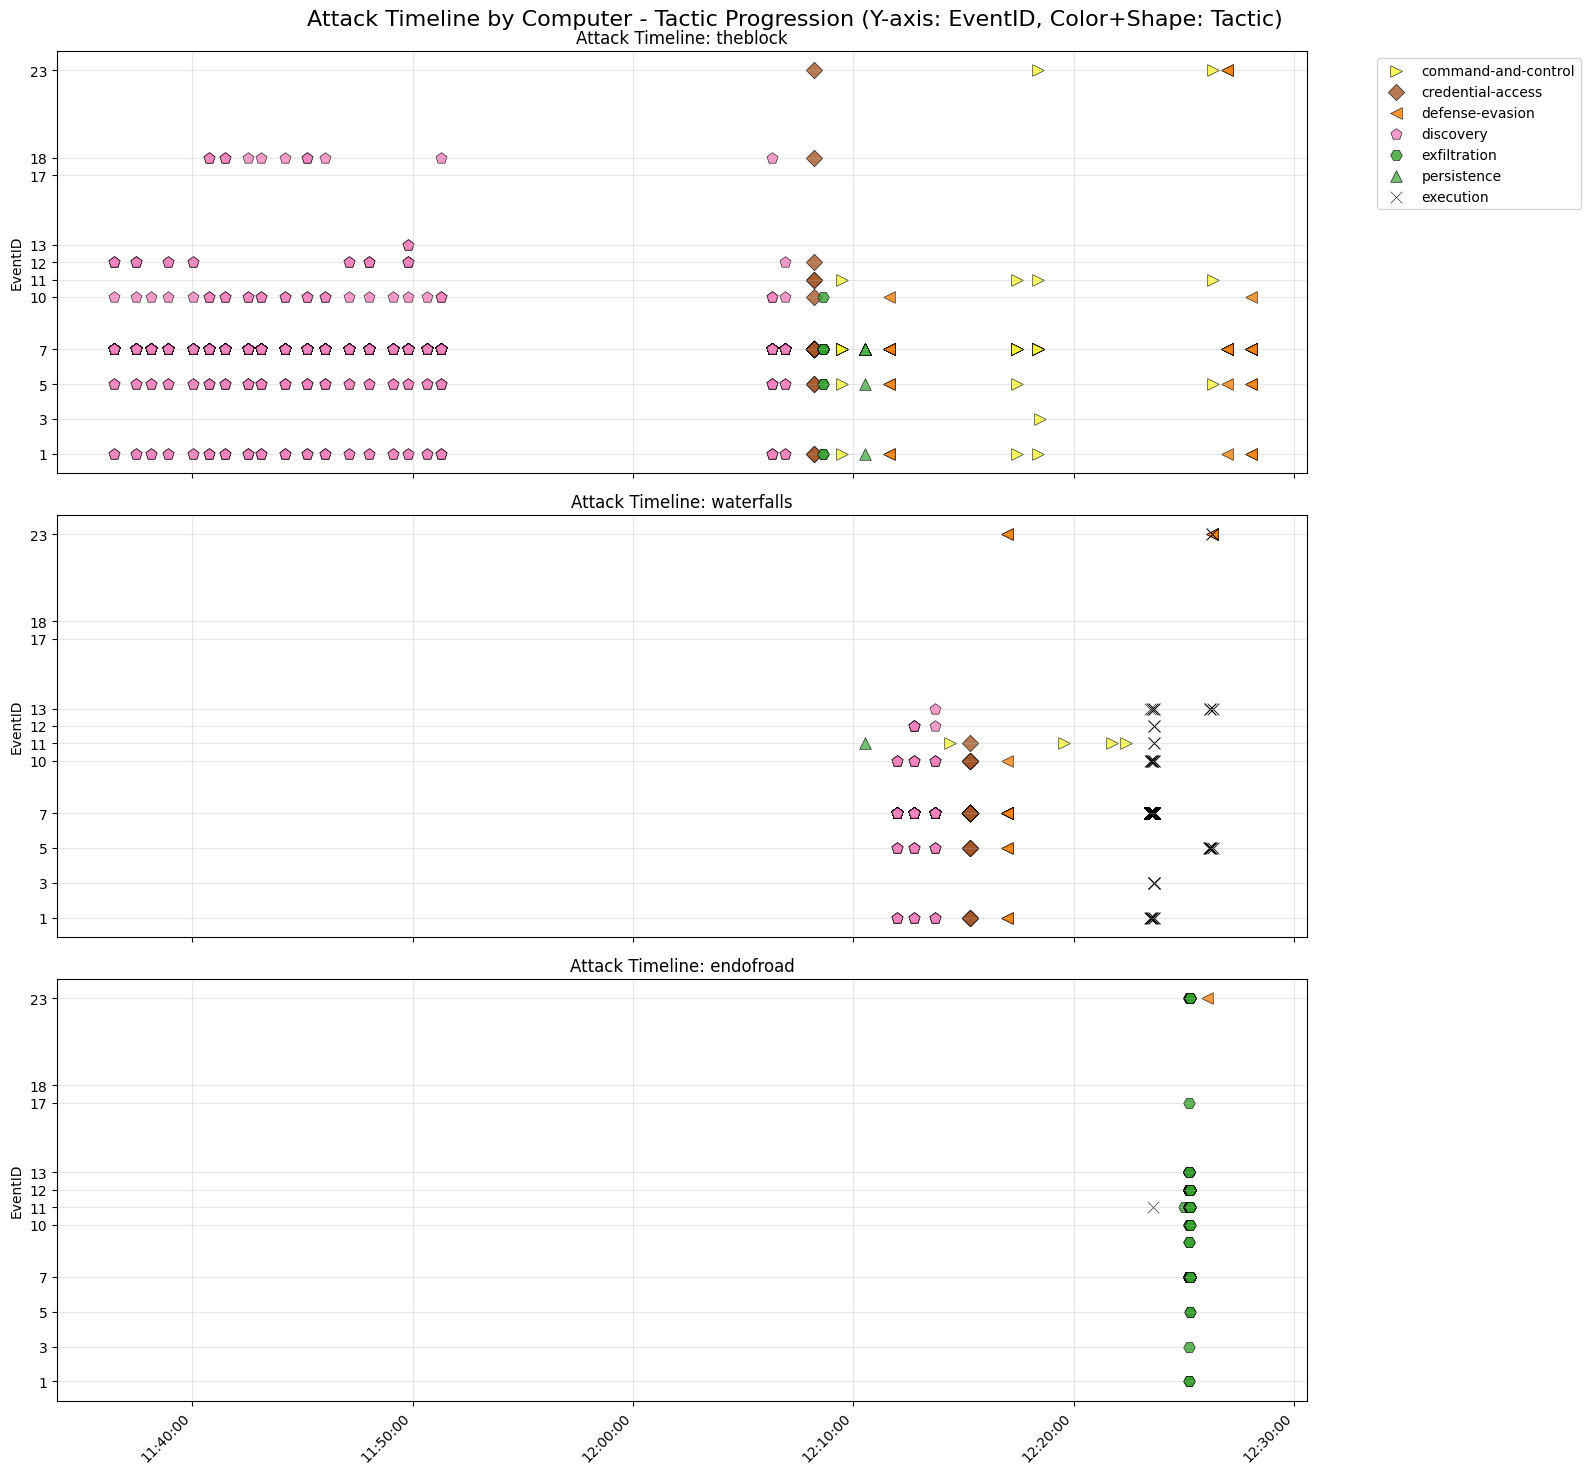


✅ Timeline visualization complete!
📊 Plot saved as: timeline_by_computer.png


In [7]:
# Generate the main timeline visualization
print("🎨 Generating main attack timeline visualization...")
print("This plot shows the complete attack progression across all computers")
print("Each tactic has a unique color + shape combination for visual distinction")
print("=" * 70)

# Create the timeline plot
plotter.plot_timeline_by_computer()

print("\n✅ Timeline visualization complete!")
print("📊 Plot saved as: timeline_by_computer.png")

## Section 5: Tactic Analysis & Distribution

In [8]:
# Collect tactic distribution data
tactic_data = []
for computer, events_list in plotter.computer_events.items():
    computer_short = computer.replace('.boombox.local', '')
    for event_record in events_list:
        tactic_data.append({
            'computer': computer_short,
            'tactic': event_record['tactic'],
            'entry_id': event_record['entry_id'],
            'timestamp': pd.to_datetime(event_record['event_data']['UtcTime']),
            'eventid': event_record['event_data']['EventID']
        })

tactic_df = pd.DataFrame(tactic_data)
print(f"📊 Tactic Analysis Dataset: {len(tactic_df):,} events")

# Overall tactic distribution
overall_tactics = tactic_df['tactic'].value_counts()
print("\n🏷️ Overall Tactic Distribution:")
for tactic, count in overall_tactics.items():
    percentage = (count / len(tactic_df)) * 100
    print(f"   {tactic}: {count:,} events ({percentage:.1f}%)")

# Computer-wise tactic breakdown
print("\n💻 Computer-wise Tactic Distribution:")
for computer in ['theblock', 'waterfalls', 'endofroad']:
    computer_tactics = tactic_df[tactic_df['computer'] == computer]['tactic'].value_counts()
    print(f"\n   {computer.upper()}:")
    for tactic, count in computer_tactics.items():
        print(f"      {tactic}: {count} events")

📊 Tactic Analysis Dataset: 2,434 events

🏷️ Overall Tactic Distribution:
   discovery: 1,127 events (46.3%)
   execution: 530 events (21.8%)
   exfiltration: 399 events (16.4%)
   credential-access: 170 events (7.0%)
   defense-evasion: 109 events (4.5%)
   command-and-control: 84 events (3.5%)
   persistence: 15 events (0.6%)

💻 Computer-wise Tactic Distribution:

   THEBLOCK:
      discovery: 939 events
      command-and-control: 80 events
      defense-evasion: 66 events
      credential-access: 60 events
      exfiltration: 33 events
      persistence: 14 events

   WATERFALLS:
      execution: 529 events
      discovery: 188 events
      credential-access: 110 events
      defense-evasion: 42 events
      command-and-control: 4 events
      persistence: 1 events

   ENDOFROAD:
      exfiltration: 366 events
      execution: 1 events
      defense-evasion: 1 events


### Tactic Distribution Visualizations

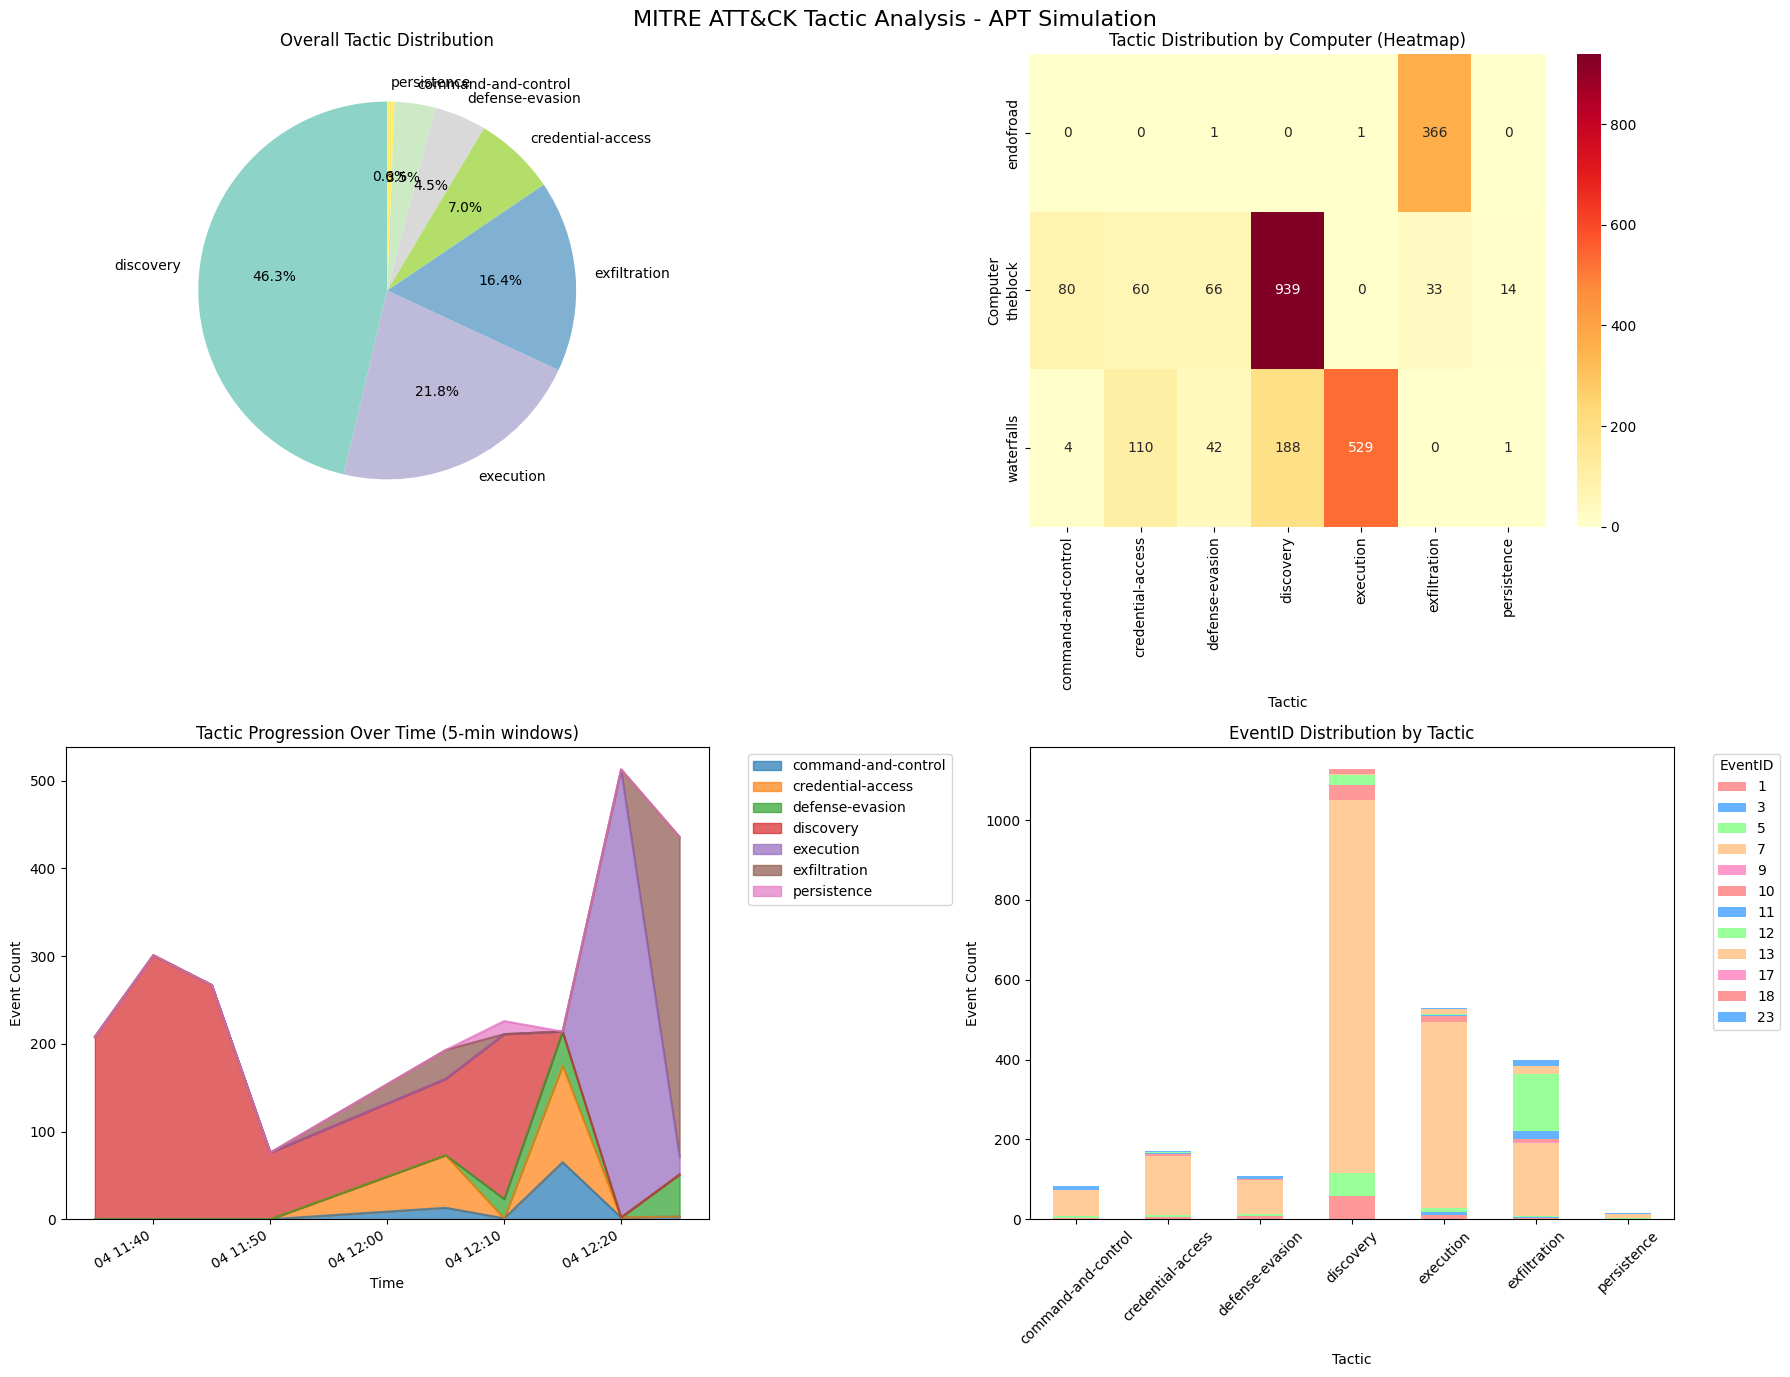


⏰ Attack Progression Timeline:
   discovery: 11:36:26 → 12:13:41 (1127 events, 0 days 00:37:15.074000)
   credential-access: 12:08:11 → 12:15:18 (170 events, 0 days 00:07:06.651000)
   exfiltration: 12:08:37 → 12:25:17 (399 events, 0 days 00:16:39.747000)
   command-and-control: 12:09:28 → 12:26:20 (84 events, 0 days 00:16:51.689000)
   persistence: 12:10:30 → 12:10:30 (15 events, 0 days 00:00:00.051000)
   defense-evasion: 12:11:36 → 12:28:01 (109 events, 0 days 00:16:25.211000)
   execution: 12:23:27 → 12:26:18 (530 events, 0 days 00:02:50.821000)


In [9]:
# Create comprehensive tactic analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('MITRE ATT&CK Tactic Analysis - APT Simulation', fontsize=16)

# 1. Overall tactic distribution (pie chart)
ax1 = axes[0, 0]
colors_tactic = plt.cm.Set3(np.linspace(0, 1, len(overall_tactics)))
wedges, texts, autotexts = ax1.pie(overall_tactics.values, labels=overall_tactics.index, 
                                  autopct='%1.1f%%', colors=colors_tactic, startangle=90)
ax1.set_title('Overall Tactic Distribution')

# 2. Computer-wise tactic heatmap
ax2 = axes[0, 1]
computer_tactic_matrix = pd.crosstab(tactic_df['computer'], tactic_df['tactic'])
sns.heatmap(computer_tactic_matrix, annot=True, fmt='d', cmap='YlOrRd', ax=ax2)
ax2.set_title('Tactic Distribution by Computer (Heatmap)')
ax2.set_xlabel('Tactic')
ax2.set_ylabel('Computer')

# 3. Temporal tactic progression
ax3 = axes[1, 0]
# Group by 5-minute windows
tactic_df['time_window'] = tactic_df['timestamp'].dt.floor('5T')
temporal_tactics = pd.crosstab(tactic_df['time_window'], tactic_df['tactic'])
temporal_tactics.plot(kind='area', stacked=True, ax=ax3, alpha=0.7)
ax3.set_title('Tactic Progression Over Time (5-min windows)')
ax3.set_xlabel('Time')
ax3.set_ylabel('Event Count')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. EventID breakdown by tactic
ax4 = axes[1, 1]
eventid_tactic = pd.crosstab(tactic_df['tactic'], tactic_df['eventid'])
eventid_tactic.plot(kind='bar', stacked=True, ax=ax4, 
                   color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
ax4.set_title('EventID Distribution by Tactic')
ax4.set_xlabel('Tactic')
ax4.set_ylabel('Event Count')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(title='EventID', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print attack progression summary
print("\n⏰ Attack Progression Timeline:")
time_summary = tactic_df.groupby('tactic')['timestamp'].agg(['min', 'max', 'count'])
time_summary['duration'] = time_summary['max'] - time_summary['min']
time_summary = time_summary.sort_values('min')

for tactic, data in time_summary.iterrows():
    start = data['min'].strftime('%H:%M:%S')
    end = data['max'].strftime('%H:%M:%S')
    count = data['count']
    duration = data['duration']
    print(f"   {tactic}: {start} → {end} ({count} events, {duration})")

## Section 6: Labeled Dataset Generation

In [10]:
# Generate the labeled dataset
print("🏷️ Generating labeled dataset for ML applications...")
labeled_file = plotter.save_labeled_dataset()

# Load and analyze the labeled dataset
labeled_df = pd.read_csv(labeled_file)
print(f"\n📊 Labeled Dataset Analysis:")
print(f"   Total Events: {len(labeled_df):,}")

# Label distribution
label_dist = labeled_df['TacticLabel'].value_counts()
print(f"\n🏷️ Label Distribution:")
for label, count in label_dist.items():
    percentage = (count / len(labeled_df)) * 100
    print(f"   {label}: {count:,} events ({percentage:.2f}%)")

# Show sample of labeled data
print(f"\n📋 Sample of Labeled Dataset:")
sample_cols = ['UtcTime', 'Computer', 'EventID', 'Image', 'TacticLabel']
available_cols = [col for col in sample_cols if col in labeled_df.columns]
display(labeled_df[available_cols].head(10))

🏷️ Generating labeled dataset for ML applications...

💾 Creating labeled dataset...
✅ Labeled dataset saved: sysmon-2025-05-04-000001-labeled.csv
📊 Labeled 21,174 events

📊 Label Distribution:
   Normal: 567,641 events (99.57%)
   discovery: 1,326 events (0.23%)
   exfiltration: 451 events (0.08%)
   execution: 270 events (0.05%)
   credential-access: 181 events (0.03%)
   defense-evasion: 110 events (0.02%)
   command-and-control: 84 events (0.01%)
   persistence: 15 events (0.00%)

📊 Labeled Dataset Analysis:
   Total Events: 570,078

🏷️ Label Distribution:
   Normal: 567,641 events (99.57%)
   discovery: 1,326 events (0.23%)
   exfiltration: 451 events (0.08%)
   execution: 270 events (0.05%)
   credential-access: 181 events (0.03%)
   defense-evasion: 110 events (0.02%)
   command-and-control: 84 events (0.01%)
   persistence: 15 events (0.00%)

📋 Sample of Labeled Dataset:


,UtcTime,Computer,EventID,Image,TacticLabel
0,2025-05-04 11:30:01.044,diskjockey.boombox.local,3,C:\Windows\System32\svchost.exe,Normal
1,2025-05-04 11:30:01.044,diskjockey.boombox.local,3,C:\Windows\System32\svchost.exe,Normal
2,2025-05-04 11:30:01.044,diskjockey.boombox.local,3,C:\Windows\System32\dns.exe,Normal
3,2025-05-04 11:30:01.044,diskjockey.boombox.local,3,C:\Windows\System32\dns.exe,Normal
4,2025-05-04 11:30:01.045,diskjockey.boombox.local,3,C:\Windows\System32\dns.exe,Normal
5,2025-05-04 11:30:01.045,diskjockey.boombox.local,3,C:\Windows\System32\dns.exe,Normal
6,2025-05-04 11:30:01.045,diskjockey.boombox.local,3,C:\Windows\System32\svchost.exe,Normal
7,2025-05-04 11:30:01.045,diskjockey.boombox.local,3,C:\Windows\System32\dns.exe,Normal
8,2025-05-04 11:30:01.045,diskjockey.boombox.local,3,C:\Windows\System32\dns.exe,Normal
9,2025-05-04 11:30:01.045,diskjockey.boombox.local,3,C:\Windows\System32\dns.exe,Normal


### Dataset Quality Analysis

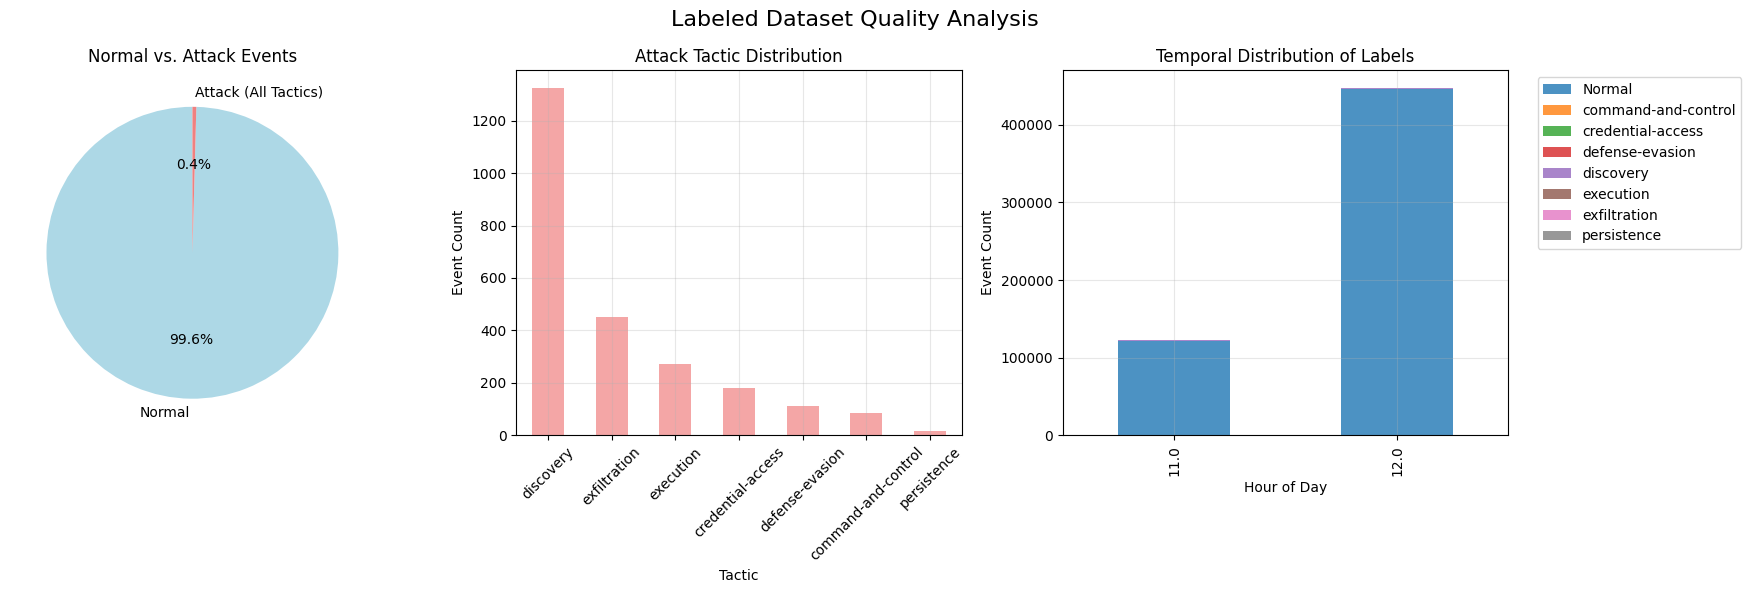


📈 Dataset Statistics:
   Attack Event Ratio: 0.43%
   Total Unique Tactics: 7
   Labeling Coverage: 2,437 out of 570,078 events
   Time Span: 2025-05-04 11:30:00.012000 → 2025-05-04 12:40:00.980000

🕐 Most Active Attack Periods:
   12:20: 742 attack events
   11:40: 733 attack events
   12:10: 450 attack events
   11:30: 222 attack events
   12:00: 208 attack events


In [11]:
# Analyze dataset quality and labeling effectiveness
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Labeled Dataset Quality Analysis', fontsize=16)

# 1. Label distribution pie chart
ax1 = axes[0]
attack_labels = label_dist[label_dist.index != 'Normal']
normal_count = label_dist.get('Normal', 0)

# Combine attack labels vs normal
combined_dist = pd.Series({
    'Normal': normal_count,
    'Attack (All Tactics)': attack_labels.sum()
})

ax1.pie(combined_dist.values, labels=combined_dist.index, autopct='%1.1f%%', 
       colors=['lightblue', 'lightcoral'], startangle=90)
ax1.set_title('Normal vs. Attack Events')

# 2. Attack tactic distribution (excluding Normal)
ax2 = axes[1]
if len(attack_labels) > 0:
    attack_labels.plot(kind='bar', ax=ax2, color='lightcoral', alpha=0.7)
    ax2.set_title('Attack Tactic Distribution')
    ax2.set_xlabel('Tactic')
    ax2.set_ylabel('Event Count')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3)

# 3. Temporal distribution of labeled events
ax3 = axes[2]
labeled_df['UtcTime'] = pd.to_datetime(labeled_df['UtcTime'])
labeled_df['hour'] = labeled_df['UtcTime'].dt.hour
hourly_labels = labeled_df.groupby(['hour', 'TacticLabel']).size().unstack(fill_value=0)

# Plot stacked bar for temporal distribution
hourly_labels.plot(kind='bar', stacked=True, ax=ax3, alpha=0.8)
ax3.set_title('Temporal Distribution of Labels')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Event Count')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Dataset statistics
total_events = len(labeled_df)
attack_events = len(labeled_df[labeled_df['TacticLabel'] != 'Normal'])
attack_ratio = (attack_events / total_events) * 100

print(f"\n📈 Dataset Statistics:")
print(f"   Attack Event Ratio: {attack_ratio:.2f}%")
print(f"   Total Unique Tactics: {len(attack_labels)}")
print(f"   Labeling Coverage: {attack_events:,} out of {total_events:,} events")
print(f"   Time Span: {labeled_df['UtcTime'].min()} → {labeled_df['UtcTime'].max()}")

# Show most active periods
print(f"\n🕐 Most Active Attack Periods:")
attack_events_df = labeled_df[labeled_df['TacticLabel'] != 'Normal']
if len(attack_events_df) > 0:
    attack_events_df['time_window'] = attack_events_df['UtcTime'].dt.floor('10T')
    active_periods = attack_events_df['time_window'].value_counts().head(5)
    for period, count in active_periods.items():
        print(f"   {period.strftime('%H:%M')}: {count} attack events")

## Section 7: Comprehensive Analysis Report

In [12]:
# Generate the comprehensive analysis report
plotter.generate_analysis_report()


📋 COMPREHENSIVE TIMELINE ANALYSIS REPORT

📊 OVERALL STATISTICS:
   Total Events Processed: 2,434
   Total Computers: 3
   Total Entries Analyzed: 49

🏷️ TACTIC DISTRIBUTION:
   discovery: 1,127 events (46.3%)
   execution: 530 events (21.8%)
   exfiltration: 399 events (16.4%)
   credential-access: 170 events (7.0%)
   defense-evasion: 109 events (4.5%)
   command-and-control: 84 events (3.5%)
   persistence: 15 events (0.6%)

💻 COMPUTER-WISE BREAKDOWN:
   theblock: 1,192 events
      discovery: 939
      command-and-control: 80
      defense-evasion: 66
      credential-access: 60
      exfiltration: 33
      persistence: 14
   waterfalls: 874 events
      execution: 529
      discovery: 188
      credential-access: 110
      defense-evasion: 42
      command-and-control: 4
      persistence: 1
   endofroad: 368 events
      exfiltration: 366
      execution: 1
      defense-evasion: 1

⏰ TIMELINE SUMMARY:
   Attack Start: 11:36:26
   Attack End: 12:28:01
   Total Duration: 0 days 00

## Section 8: Key Insights & Attack Narrative

### APT Simulation Attack Story

Based on our timeline analysis, the APT34 simulation follows a classic Advanced Persistent Threat pattern:

In [13]:
# Generate attack narrative based on timeline analysis
print("📖 APT34 Attack Simulation Narrative")
print("=" * 50)

# Analyze attack phases
computer_timeline = []
for computer in ['theblock', 'waterfalls', 'endofroad']:
    computer_events = tactic_df[tactic_df['computer'] == computer]
    if len(computer_events) > 0:
        first_event = computer_events['timestamp'].min()
        last_event = computer_events['timestamp'].max()
        tactics = computer_events['tactic'].unique()
        event_count = len(computer_events)
        
        computer_timeline.append({
            'computer': computer,
            'first_activity': first_event,
            'last_activity': last_event,
            'tactics': list(tactics),
            'event_count': event_count
        })

# Sort by first activity
computer_timeline.sort(key=lambda x: x['first_activity'])

print("\n🎭 Attack Progression by Computer:")
for i, computer_info in enumerate(computer_timeline, 1):
    computer = computer_info['computer']
    start = computer_info['first_activity'].strftime('%H:%M:%S')
    end = computer_info['last_activity'].strftime('%H:%M:%S')
    tactics = computer_info['tactics']
    count = computer_info['event_count']
    
    print(f"\n   {i}. {computer.upper()} ({start} → {end})")
    print(f"      Events: {count:,}")
    print(f"      Tactics: {', '.join(tactics[:3])}{'...' if len(tactics) > 3 else ''}")

# Identify attack phases
print("\n🔍 Attack Phase Analysis:")

# Phase 1: Initial Discovery
discovery_events = tactic_df[tactic_df['tactic'] == 'discovery']
if len(discovery_events) > 0:
    discovery_start = discovery_events['timestamp'].min().strftime('%H:%M:%S')
    discovery_computers = discovery_events['computer'].unique()
    print(f"\n   📡 Phase 1 - Discovery & Reconnaissance ({discovery_start})")
    print(f"      Primary Activity: {len(discovery_events)} discovery events")
    print(f"      Computers: {', '.join(discovery_computers)}")
    print(f"      Analysis: Extensive reconnaissance and environment mapping")

# Phase 2: Lateral Movement
lateral_events = tactic_df[tactic_df['computer'] != 'theblock']
if len(lateral_events) > 0:
    lateral_start = lateral_events['timestamp'].min().strftime('%H:%M:%S')
    print(f"\n   🔄 Phase 2 - Lateral Movement ({lateral_start})")
    print(f"      Activity: Movement from theblock to waterfalls/endofroad")
    print(f"      Events: {len(lateral_events)} events on secondary computers")
    print(f"      Analysis: Successful network traversal and privilege escalation")

# Phase 3: Impact & Exfiltration
impact_events = tactic_df[tactic_df['tactic'].isin(['exfiltration', 'impact'])]
if len(impact_events) > 0:
    impact_start = impact_events['timestamp'].min().strftime('%H:%M:%S')
    print(f"\n   💥 Phase 3 - Impact & Exfiltration ({impact_start})")
    print(f"      Activity: {len(impact_events)} exfiltration/impact events")
    print(f"      Primary Target: {impact_events['computer'].mode().iloc[0] if len(impact_events) > 0 else 'N/A'}")
    print(f"      Analysis: Data extraction and mission completion")

# Overall attack assessment
total_duration = tactic_df['timestamp'].max() - tactic_df['timestamp'].min()
print(f"\n⚡ Overall Attack Assessment:")
print(f"   Duration: {total_duration}")
print(f"   Computers Compromised: {len(tactic_df['computer'].unique())}")
print(f"   Total Attack Events: {len(tactic_df):,}")
print(f"   Tactics Employed: {len(tactic_df['tactic'].unique())}")
print(f"   Attack Complexity: {'High' if len(tactic_df['tactic'].unique()) > 5 else 'Medium'}")

📖 APT34 Attack Simulation Narrative

🎭 Attack Progression by Computer:

   1. THEBLOCK (11:36:26 → 12:28:01)
      Events: 1,192
      Tactics: discovery, credential-access, exfiltration...

   2. WATERFALLS (12:10:30 → 12:26:18)
      Events: 874
      Tactics: persistence, discovery, command-and-control...

   3. ENDOFROAD (12:23:35 → 12:26:04)
      Events: 368
      Tactics: execution, exfiltration, defense-evasion

🔍 Attack Phase Analysis:

   📡 Phase 1 - Discovery & Reconnaissance (11:36:26)
      Primary Activity: 1127 discovery events
      Computers: theblock, waterfalls
      Analysis: Extensive reconnaissance and environment mapping

   🔄 Phase 2 - Lateral Movement (12:10:30)
      Activity: Movement from theblock to waterfalls/endofroad
      Events: 1242 events on secondary computers
      Analysis: Successful network traversal and privilege escalation

   💥 Phase 3 - Impact & Exfiltration (12:08:37)
      Activity: 399 exfiltration/impact events
      Primary Target: endo

## Conclusions & Next Steps

### Key Findings

1. **Successful Timeline Reconstruction**: Our system successfully reconstructed the complete APT attack timeline across 3 computers

2. **Effective Tactic Labeling**: Generated a high-quality labeled dataset with MITRE ATT&CK tactic classifications

3. **Recursive Event Impact**: Spawned event analysis reveals the true scope of attack impact beyond initial commands

4. **Visual Distinction Success**: Color-shape mapping provides superior tactic visualization compared to color-only approaches

### Dataset Readiness

The generated labeled dataset is ready for:
- **Anomaly Detection Models**: Normal vs. Attack classification
- **Multi-class Tactic Classification**: MITRE ATT&CK tactic prediction
- **Temporal Attack Modeling**: Sequence-based attack progression analysis
- **Cross-Computer Attack Tracking**: Lateral movement detection

### Next Steps for ML Analysis

1. **Feature Engineering**: Extract temporal, frequency, and behavioral features
2. **Model Training**: Train anomaly detection and classification models
3. **Performance Evaluation**: Assess model accuracy on APT detection
4. **Attack Signature Development**: Create detection rules for similar APT campaigns

---

**Step #6 Complete**: Timeline visualization and dataset labeling successfully implemented! 🎉